In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=Warning)

## 원본 MBTI 데이터

In [56]:
df = pd.read_csv('mbti_col.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,posts,type,E/I,S/N,T/F,J/P
0,know intj tool use interaction people excuse a...,INTJ,0,0,1,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,0,0,1,1
2,preferably p hd low except wew lad video p min...,INTJ,0,0,1,1
3,drink like wish could drink red wine give head...,INTJ,0,0,1,1
4,space program ah bad deal meing freelance max ...,INTJ,0,0,1,1
...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,0,0,0,0
106063,fizzle around time mention sure mistake thing ...,INFP,0,0,0,0
106064,schedule modify hey w intp strong wing underst...,INFP,0,0,0,0
106065,enfj since january busy schedule able spend li...,INFP,0,0,0,0


## 다운 샘플링 1000

In [61]:
mbti = ['INFJ', 'INTJ', 'INFP', 'INTP', 'ENFJ', 'ENTJ', 'ENFP', 'ENTP', 
         'ISFJ', 'ISTJ', 'ISFP', 'ISTP', 'ESFJ', 'ESTJ', 'ESFP', 'ESTP']

In [59]:
df_type = df.groupby(['type'])
func = lambda g: g.sort_values(by = 'type', ascending=False)[:1000]

df_down = df_type.apply(func)

In [60]:
df_down

posts  type  E/I  S/N  \
type                                                                            
ENFJ 53580  yeah quite like idea actually think could numb...  ENFJ    1    0   
     54599  make u look bad comparison hear trouble one ki...  ENFJ    1    0   
     54608  get offend annoy question come across selfish ...  ENFJ    1    0   
     54607  pretend happen infrequent occasion actually mi...  ENFJ    1    0   
     54606  inside feel radiate love feel would try use wo...  ENFJ    1    0   
...                                                       ...   ...  ...  ...   
ISTP 53157  weird something fond benefit sure put se first...  ISTP    0    1   
     53158  appease curiosity u wot istp friend istps one ...  ISTP    0    1   
     53159  come conclusion simply retard welcome independ...  ISTP    0    1   
     53160  type infj probably see mystic magic stuff thin...  ISTP    0    1   
     53161  task cut friend lowkey feel guiy know example ...  ISTP    0    1   

            T/F  J/P  
type                  
ENFJ 53580    0    1  
     54599    0    1  
     54608    0    1  
     54607    0    1  
     54606    0    1  
...         ...  ...  
ISTP 53157    1    0  
     53158    1    0  
     53159    1    0  
     53160    1    0  
     53161    1    0  

[13548 rows x 6 columns]

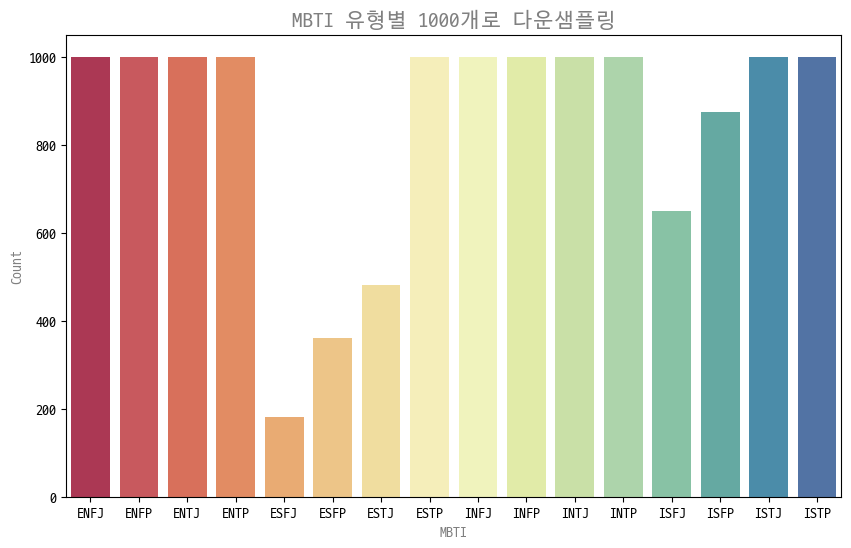

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(10, 6))
#palette = sns.color_palette("crest", n_colors=16)
palette = sns.color_palette("Spectral", n_colors=16)
sns.countplot(x='type', data=df_down, palette=palette)

plt.title("MBTI 유형별 1000개로 다운샘플링", fontsize=15, color='gray')
plt.xlabel("MBTI", color='gray')
plt.ylabel("Count", color='gray')

plt.savefig('mbti_count_down')
plt.show()

## 중복 데이터 추가

In [47]:
df_min = pd.read_csv('MBTI_min_1000.csv')
df_min = df_min.drop(columns=['Unnamed: 0'])
df_min

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
110357,past orientate literally could ask think write...,ESFJ
110358,day without interact anyone real world absolut...,ESFJ
110359,information regard w advantage anytime someone...,ESFJ
110360,anna netrebko voice unique voice sound shrill ...,ESFJ


In [85]:
df_min['type'].value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ISFP     1750
ENFJ     1534
ESTJ     1446
ISFJ     1300
ESFJ     1267
ISTJ     1243
ESFP     1080
Name: type, dtype: int64

In [90]:
df_min_type = df_min.groupby(['type'])
func = lambda g: g.sort_values(by = 'type', ascending=False)[:1000]

df_min_down = df_min_type.apply(func)
df_min_down

posts  type
type                                                               
ENFJ 53580  yeah quite like idea actually think could numb...  ENFJ
     54599  make u look bad comparison hear trouble one ki...  ENFJ
     54608  get offend annoy question come across selfish ...  ENFJ
     54607  pretend happen infrequent occasion actually mi...  ENFJ
     54606  inside feel radiate love feel would try use wo...  ENFJ
...                                                       ...   ...
ISTP 53157  weird something fond benefit sure put se first...  ISTP
     53158  appease curiosity u wot istp friend istps one ...  ISTP
     53159  come conclusion simply retard welcome independ...  ISTP
     53160  type infj probably see mystic magic stuff thin...  ISTP
     53161  task cut friend lowkey feel guiy know example ...  ISTP

[16000 rows x 2 columns]

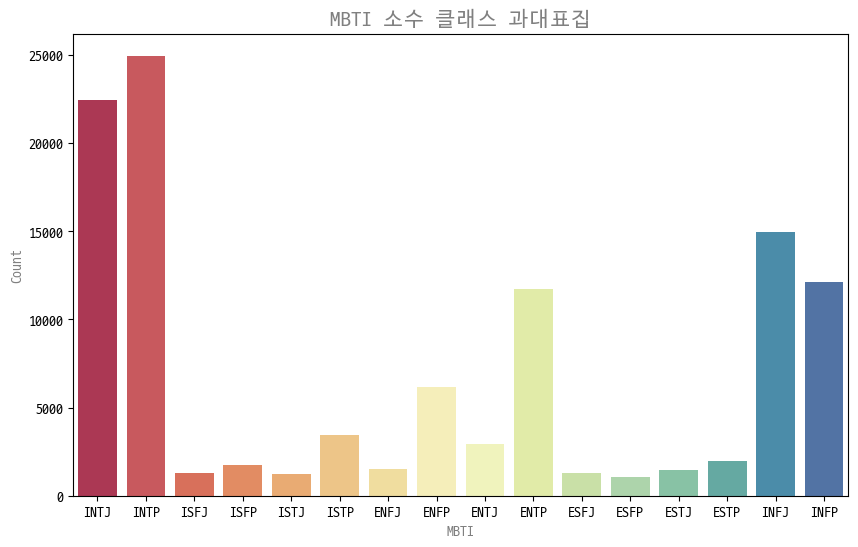

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(10, 6))
#palette = sns.color_palette("crest", n_colors=16)
palette = sns.color_palette("Spectral", n_colors=16)
sns.countplot(x='type', data=df_min, palette=palette)

plt.title("MBTI 소수 클래스 과대표집", fontsize=15, color='gray')
plt.xlabel("MBTI", color='gray')
plt.ylabel("Count", color='gray')

plt.savefig('mbti_count_over')
plt.show()

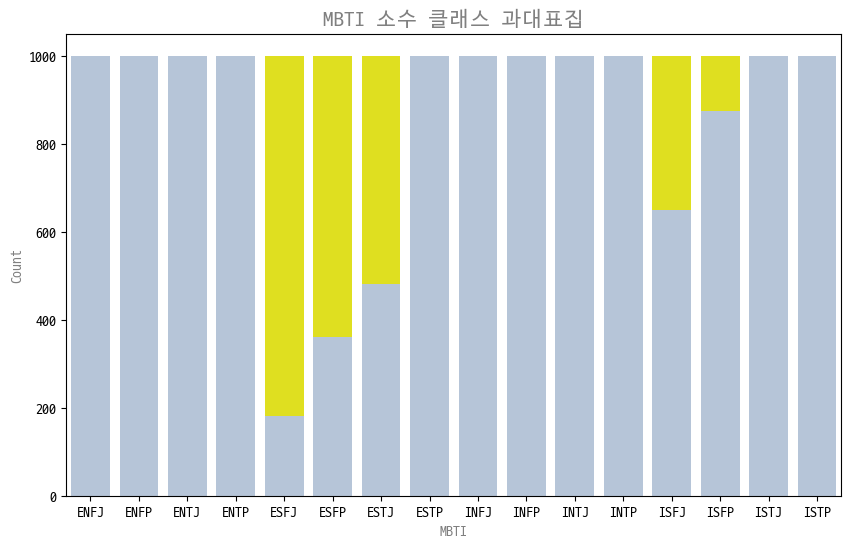

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='type', data=df_min_down, color='yellow')  # 중복으로 과대표집한 데이터

palette = sns.color_palette("Spectral", n_colors=16)
sns.countplot(x='type', data=df_down, color='lightsteelblue')  # 1000개로 다운샘플링한 데이터

plt.title("MBTI 소수 클래스 과대표집", fontsize=15, color='gray')
plt.xlabel("MBTI", color='gray')
plt.ylabel("Count", color='gray')


plt.savefig('mbti_count_vsdown_2')
plt.show()

## MBTI 유형별 합계

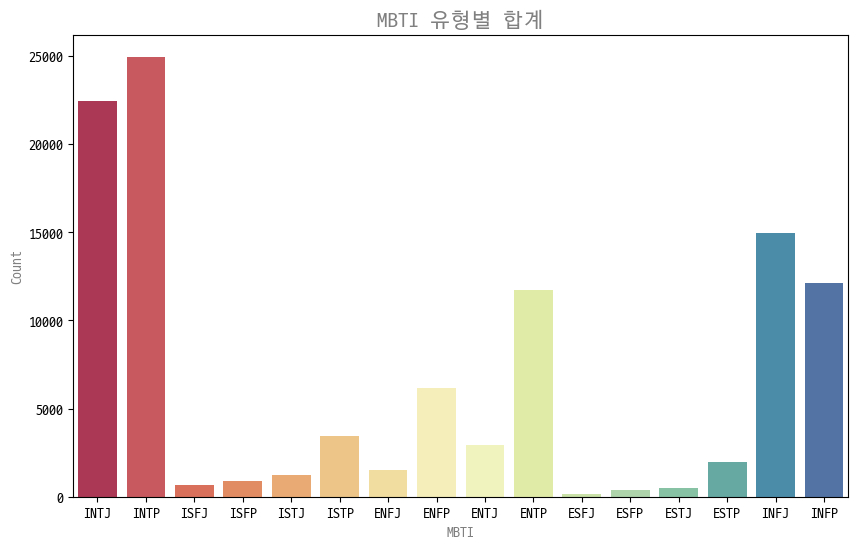

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(10, 6))
#palette = sns.color_palette("crest", n_colors=16)
palette = sns.color_palette("Spectral", n_colors=16)
sns.countplot(x='type', data=df, palette=palette)

plt.title("MBTI 유형별 합계", fontsize=15, color='gray')
plt.xlabel("MBTI", color='gray')
plt.ylabel("Count", color='gray')

plt.savefig('mbti_count')
plt.show()

## 알파벳 자릿수 별로 분리하기

In [93]:
def devide_mbti(s):
    mbti = df[df['type'].str.contains(s)]
    mbti.reset_index(drop=True, inplace=True)
    mbti['type1'] = s
    mbti.to_csv('mbti_'+s+".csv", index = False)

In [3]:
mbti_alpha = ['E', 'I', 'S', 'N', 'T','F', 'J', 'P']

# csv 로 나눔
#for i in mbti_alpha:
 #   devide_mbti(i)
    
y = []
for i in mbti_alpha:
    df_alpha = pd.read_csv('mbti_' + i + ".csv")
    v_df = df_alpha['type1'].value_counts()
    y.append(v_df[i])    

In [4]:
all_df = pd.DataFrame([mbti_alpha,y]).T
all_df

,0,1
0,E,25390
1,I,80677
2,S,9201
3,N,96866
4,T,69203
5,F,36864
6,J,44435
7,P,61632


## 알파벳 자릿수 별로 count

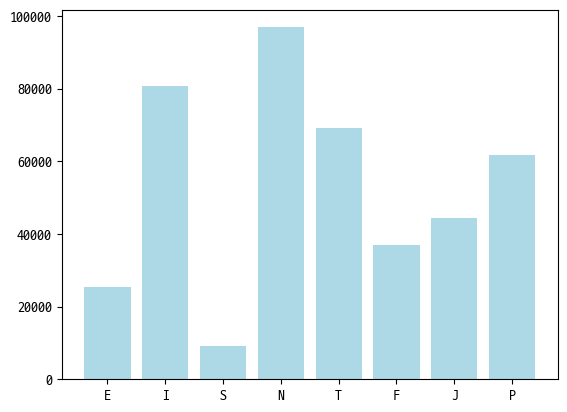

In [109]:
import matplotlib.pyplot as plt
import numpy as np

x = all_df[0]
y = all_df[1]
bar = plt.bar(x, y, color='lightblue')

plt.savefig('alpha_count')
plt.show()

In [5]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from wordcloud import WordCloud
from tqdm import tqdm

2023-06-20 15:15:42.640006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [118]:
df[df['E/I'] == 0]  # 데이터 확인

,posts,type,E/I,S/N,T/F,J/P
0,know intj tool use interaction people excuse a...,INTJ,0,0,1,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,0,0,1,1
2,preferably p hd low except wew lad video p min...,INTJ,0,0,1,1
3,drink like wish could drink red wine give head...,INTJ,0,0,1,1
4,space program ah bad deal meing freelance max ...,INTJ,0,0,1,1
...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,0,0,0,0
106063,fizzle around time mention sure mistake thing ...,INFP,0,0,0,0
106064,schedule modify hey w intp strong wing underst...,INFP,0,0,0,0
106065,enfj since january busy schedule able spend li...,INFP,0,0,0,0


100%|█████████████████████████████████████████████| 4/4 [01:45<00:00, 26.47s/it]


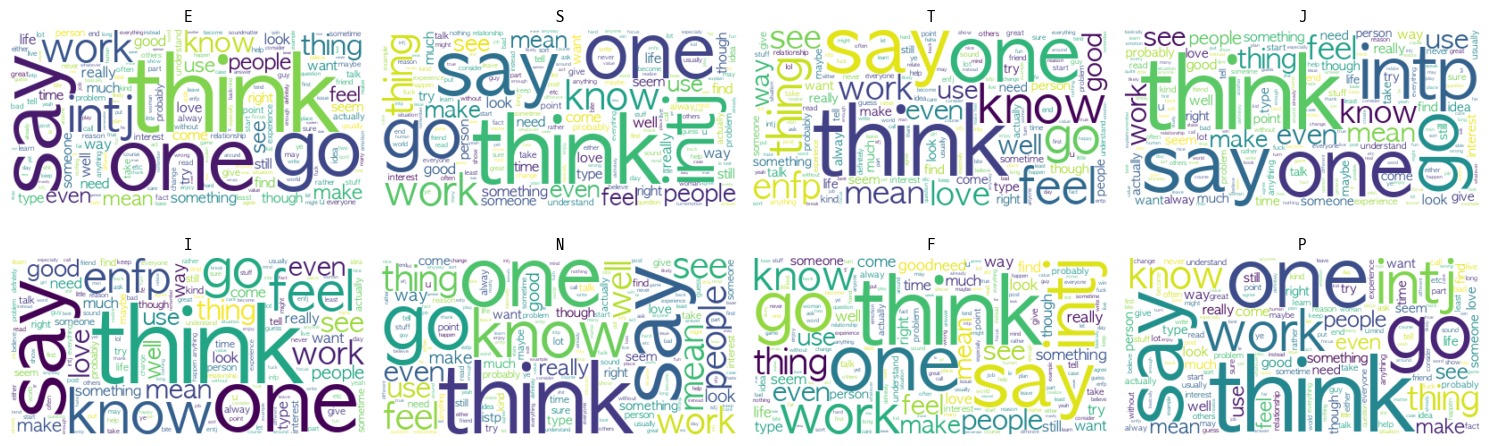

In [108]:
columns = ['E/I', 'S/N', 'T/F', 'J/P']
# 서브 플롯 사이즈
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


for i, col in enumerate(tqdm(columns)):
    
    # 각각의 columns 에 대해서 값이 0 , 1 일때 총 9000개의 데이터
    filtered_df_0 = df[df[col] == 0][:9000]
    filtered_df_1 = df[df[col] == 1][:9000]
    
    # 단어 필터링
    text_0 = ' '.join(filtered_df_0['posts'].astype(str).tolist())
    text_1 = ' '.join(filtered_df_1['posts'].astype(str).tolist())
    
    # wordcloud (값이 0일때) 에 위치 설정
    wordcloud_0 = WordCloud(font_path ="AppleGothic", background_color='white').generate(text_0)
    axes[0, i].imshow(wordcloud_0, interpolation='bilinear')
    
    axes[0, i].set_title(col[0])
    axes[0, i].axis('off')    
    
    # wordcloud (값이 1일때) 에 위치 설정
    wordcloud_1 = WordCloud(font_path ="AppleGothic", background_color='white').generate(text_1)
    axes[1, i].imshow(wordcloud_1, interpolation='bilinear')
    
    axes[1, i].set_title(col[-1])
    axes[1, i].axis('off') 
    
    
plt.tight_layout()    
plt.savefig('origin_mbti_wrdcld')

## 원본 mbti에서 알파벳 별로 1000개씩 wordcloud

100%|█████████████████████████████████████████████| 4/4 [00:15<00:00,  3.99s/it]


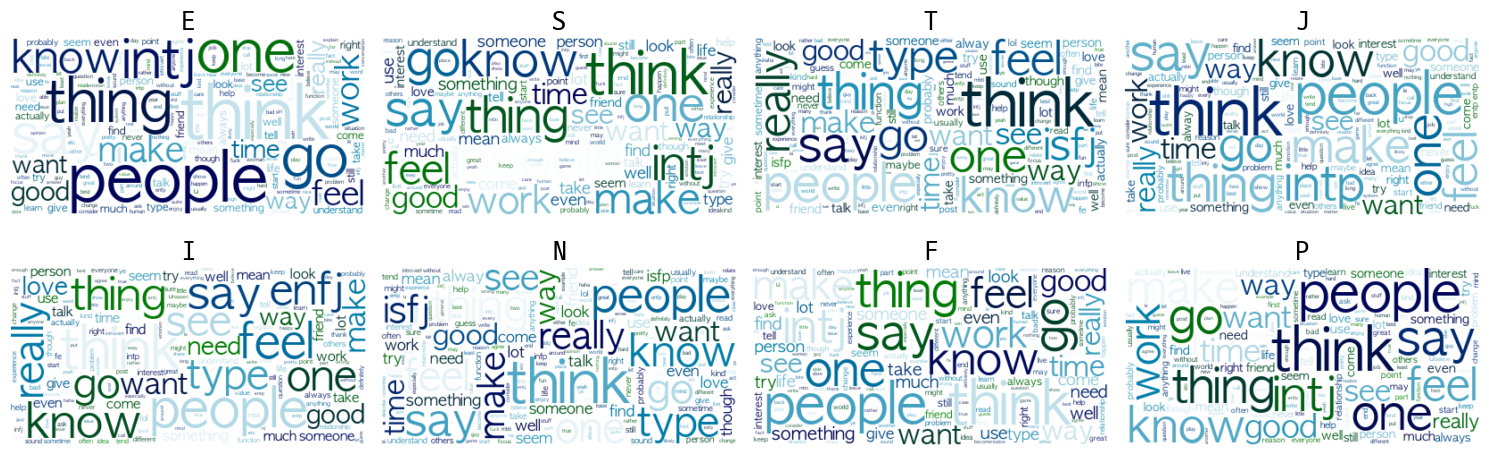

In [139]:
columns = ['E/I', 'S/N', 'T/F', 'J/P']
# 서브 플롯 사이즈
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


for i, col in enumerate(tqdm(columns)):
    
    # 각각의 columns 에 대해서 값이 1, 0 일때 총 1000개의 데이터
    filtered_df_1 = df[df[col] == 1][:1000]
    filtered_df_0 = df[df[col] == 0][:1000]
    
    # 단어 필터링
    text_1 = ' '.join(filtered_df_0['posts'].astype(str).tolist())
    text_0 = ' '.join(filtered_df_1['posts'].astype(str).tolist())
    
    # wordcloud (값이 1일때) 에 위치 설정
    wordcloud_1 = WordCloud(font_path ="AppleGothic", background_color='white', colormap="ocean").generate(text_1)
    axes[0, i].imshow(wordcloud_1, interpolation='bilinear')
    
    axes[0, i].set_title(col[0], fontsize=20)
    axes[0, i].axis('off')    
    
    # wordcloud (값이 0일때) 에 위치 설정
    wordcloud_0 = WordCloud(font_path ="AppleGothic", background_color='white', colormap="ocean").generate(text_0)
    axes[1, i].imshow(wordcloud_0, interpolation='bilinear')
    
    axes[1, i].set_title(col[-1], fontsize=20)
    axes[1, i].axis('off') 
    
    
plt.tight_layout() 
#plt.savefig('origin_mbti_wrdcld(1)')  # 사진으로 저장

## 불용어 처리한 데이터 처리

In [6]:
df_stop = pd.read_csv('MBTI_remove_stopword.csv')
df_stop = df_stop.drop(columns=['Unnamed: 0'])
df_stop = df_stop.drop(columns=['type2'])
df_stop

,posts,type
0,tool use interaction excuse antisocial truly e...,INTJ
1,rap music ehh opp yeah valid well fact sociali...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink wish could drink red wine give headache ...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
424263,stay frustrate world life take long nap add fa...,INFP
424264,fizzle around mention sure mistake move fast l...,INFP
424265,schedule modify hey w strong wing understand p...,INFP
424266,since january busy schedule able spend little ...,INFP


In [7]:
df_stop['E/I'] = df_stop['type'].apply(lambda x: x[0] == 'E').astype('int')
df_stop['S/N'] = df_stop['type'].apply(lambda x: x[1] == 'S').astype('int')
df_stop['T/F'] = df_stop['type'].apply(lambda x: x[2] == 'T').astype('int')
df_stop['J/P'] = df_stop['type'].apply(lambda x: x[3] == 'J').astype('int')

df_stop

,posts,type,E/I,S/N,T/F,J/P
0,tool use interaction excuse antisocial truly e...,INTJ,0,0,1,1
1,rap music ehh opp yeah valid well fact sociali...,INTJ,0,0,1,1
2,preferably p hd low except wew lad video p min...,INTJ,0,0,1,1
3,drink wish could drink red wine give headache ...,INTJ,0,0,1,1
4,space program ah bad deal meing freelance max ...,INTJ,0,0,1,1
...,...,...,...,...,...,...
424263,stay frustrate world life take long nap add fa...,INFP,0,0,0,0
424264,fizzle around mention sure mistake move fast l...,INFP,0,0,0,0
424265,schedule modify hey w strong wing understand p...,INFP,0,0,0,0
424266,since january busy schedule able spend little ...,INFP,0,0,0,0


## 불용어 처리한 데이터 알파벳 별로 1000개씩 wordcloud

100%|█████████████████████████████████████████████| 4/4 [00:14<00:00,  3.63s/it]


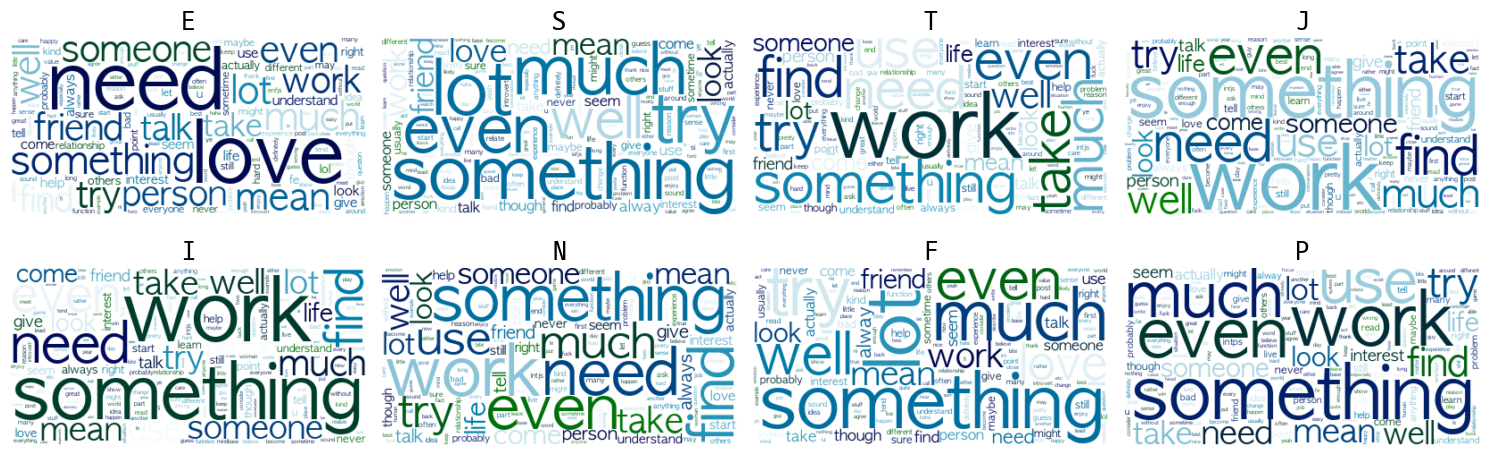

In [142]:
columns = ['E/I', 'S/N', 'T/F', 'J/P']
# 서브 플롯 사이즈
fig, axes = plt.subplots(2, 4, figsize=(15, 5))


for i, col in enumerate(tqdm(columns)):
    
    # 각각의 columns 에 대해서 값이 1, 0 일때 총 1000개의 데이터
    filtered_df_1 = df_stop[df_stop[col] == 1][:1000]
    filtered_df_0 = df_stop[df_stop[col] == 0][:1000]
    
    # 단어 필터링
    text_1 = ' '.join(filtered_df_1['posts'].astype(str).tolist())
    text_0 = ' '.join(filtered_df_0['posts'].astype(str).tolist())
    
    # wordcloud (값이 1일때) 에 위치 설정
    wordcloud_1 = WordCloud(font_path ="AppleGothic", background_color='white', colormap="ocean").generate(text_1)
    axes[0, i].imshow(wordcloud_1, interpolation='bilinear')
    
    axes[0, i].set_title(col[0], fontsize=20)
    axes[0, i].axis('off')    
    
    # wordcloud (값이 0일때) 에 위치 설정
    wordcloud_0 = WordCloud(font_path ="AppleGothic", background_color='white', colormap="ocean").generate(text_0)
    axes[1, i].imshow(wordcloud_0, interpolation='bilinear')
    
    axes[1, i].set_title(col[-1], fontsize=20)
    axes[1, i].axis('off') 
    
    
plt.tight_layout()    
#plt.savefig('stopword_mbti_wrdcld(1)')  # 사진으로 저장

## 불용어 처리된 데이터 전체 단어 빈도수

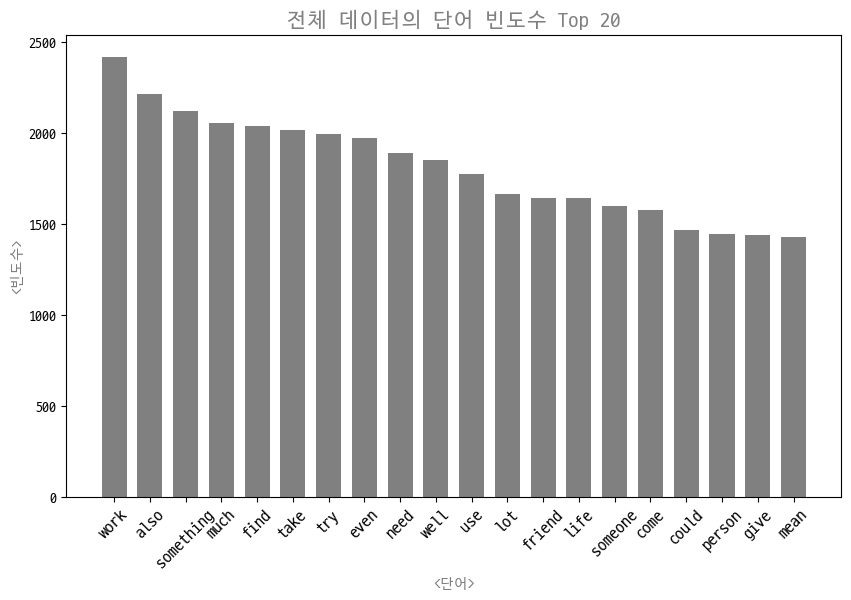

In [100]:
# 'posts' 열의 모든 단어를 하나의 리스트로 합치기
df_s = df_stop[:1000]
word_list = ' '.join(df_s['posts']).split()

# 단어 빈도수 계산
word_counts = Counter(word_list)

# 빈도수 상위 n개 단어 추출
top_n = 20  # 상위 n개 단어
top_words = dict(word_counts.most_common(top_n))

# 막대 그래프로 표현
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='gray', width=0.7)
plt.title("전체 데이터의 단어 빈도수 Top {}".format(top_n), fontsize=15, color='gray')
plt.xlabel("<단어>", color='gray')
plt.ylabel("<빈도수>", color='gray')
plt.xticks(rotation=45, fontsize=12)

#plt.savefig('entire_frequency_bar_100')  # 사진으로 저장
plt.show()

## 전체 단어 빈도수 그래프
- 1000개 자르지 X

In [ ]:
plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

In [92]:
from collections import Counter

# 'posts' 열의 모든 단어를 하나의 리스트로 합치기
word_list = ' '.join(df['posts']).split()

# 단어 빈도수 계산
word_counts = Counter(word_list)

# 빈도수 상위 n개 단어 추출
top_n = 20  # 상위 n개 단어
top_words = dict(word_counts.most_common(top_n))

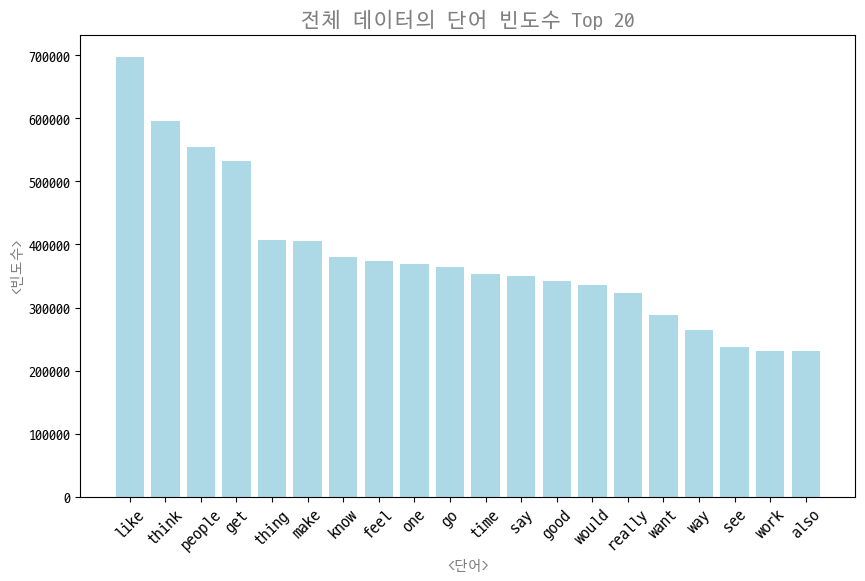

In [93]:
# 막대 그래프로 표현
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='lightblue')
plt.title("전체 데이터의 단어 빈도수 Top {}".format(top_n), fontsize=15, color='gray')
plt.xlabel("<단어>", color='gray')
plt.ylabel("<빈도수>", color='gray')
plt.xticks(rotation=45, fontsize=12)

plt.savefig('entire_frequency_bar_20')  # 사진으로 저장
plt.show()

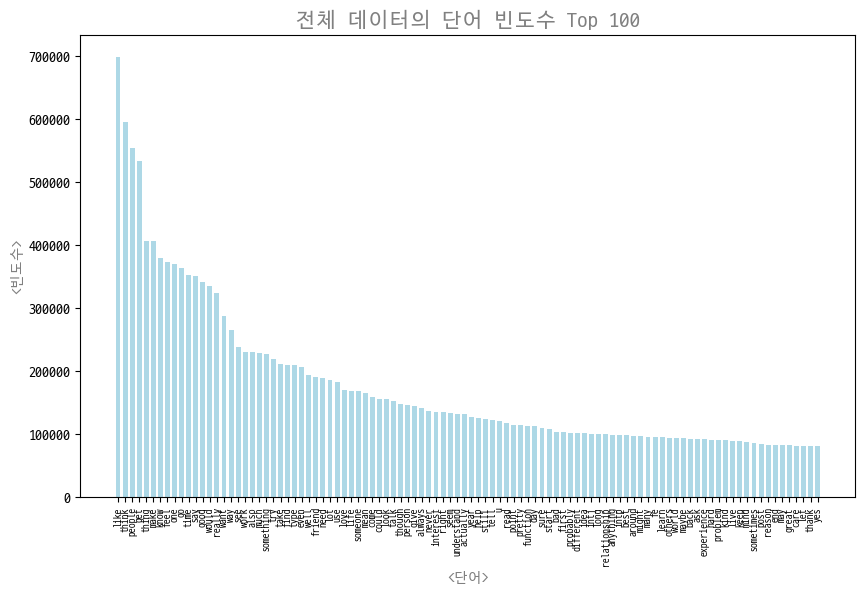

In [91]:
# 빈도수 상위 n개 단어 추출
top_n = 100  # 상위 n개 단어
top_words = dict(word_counts.most_common(top_n))

# 막대 그래프로 표현
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='lightblue', width=0.7)
plt.title("전체 데이터의 단어 빈도수 Top {}".format(top_n), fontsize=15, color='gray')
plt.xlabel("<단어>", color='gray')
plt.ylabel("<빈도수>", color='gray')
plt.xticks(rotation=90, fontsize=7)

plt.savefig('entire_frequency_bar_100')  # 사진으로 저장
plt.show()

## 알파벳 자릿수 별 단어 빈도수

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.98it/s]


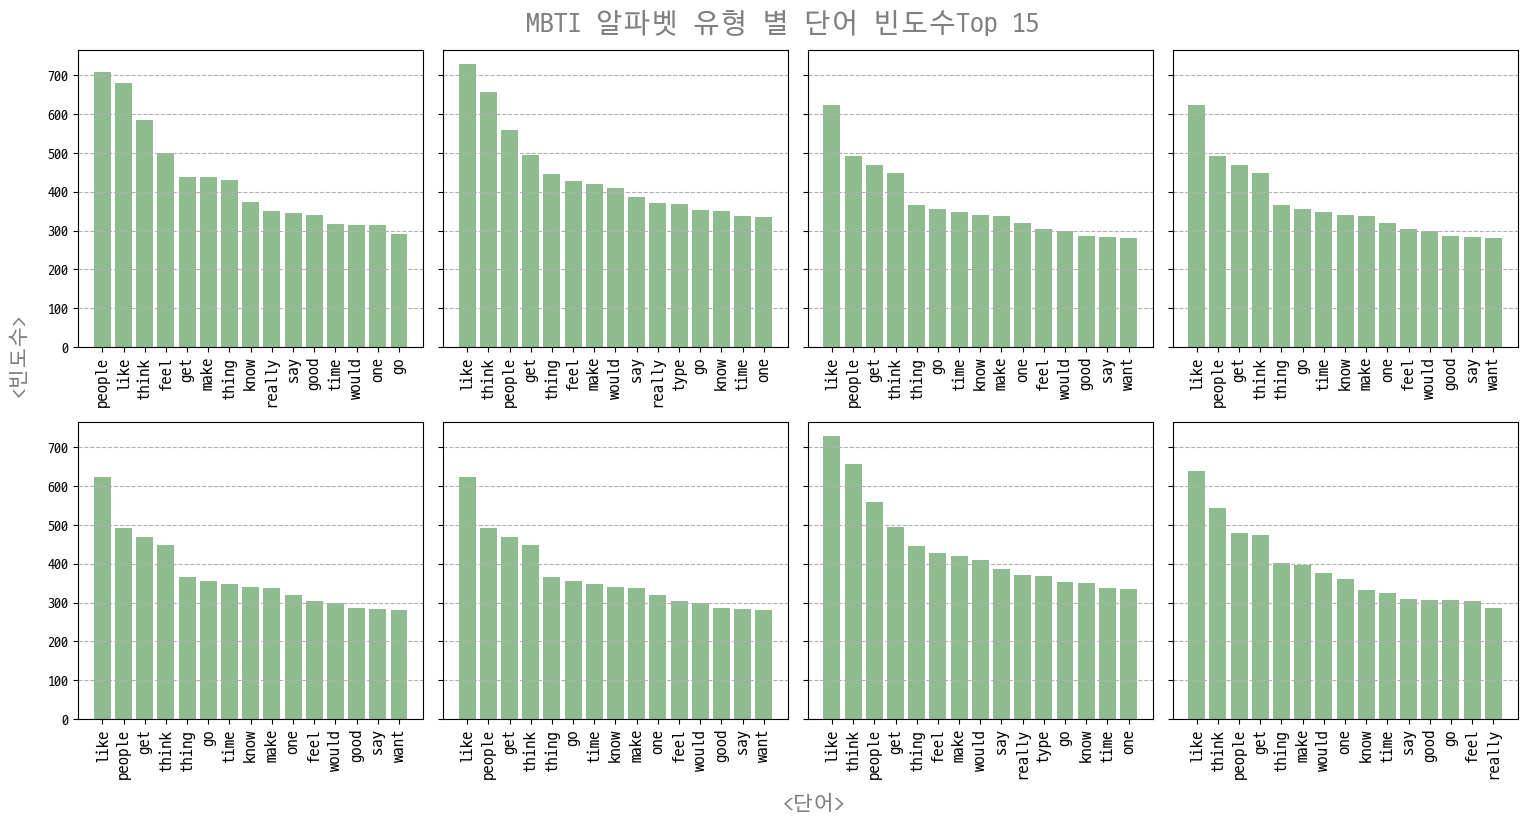

In [105]:
columns = ['E/I', 'S/N', 'T/F', 'J/P']

top_n = 15  # 상위 n개 단어

# 서브 플롯 사이즈
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)

# 서브플롯 전체 제목 설정
fig.suptitle("MBTI 알파벳 유형 별 단어 빈도수Top {}".format(top_n), fontsize=20, color='gray')

# 전체 서브플롯 x축, y축 이름 설정
fig.text(0.5, -0.02, "<단어>", fontsize=15, color='gray')
fig.text(-0.015, 0.5, "<빈도수>", fontsize=15, rotation='vertical', color='gray')

for i, col in enumerate(tqdm(columns)):

    # 각각의 columns 에 대해서 값이 1, 0 일때 총 1000개의 데이터
    filtered_df_1 = df[df[col] == 1][:100]
    filtered_df_0 = df[df[col] == 0][:100]    
    
    # 'posts' 열의 모든 단어를 하나의 리스트로 합치기
    word_list_1 = ' '.join(filtered_df_1['posts']).split()
    word_list_0 = ' '.join(filtered_df_0['posts']).split()

    # 단어 빈도수 계산
    word_counts_1 = Counter(word_list_1)
    word_counts_0 = Counter(word_list_0)

    # 빈도수 상위 n개 단어 추출
    top_words_1 = dict(word_counts_1.most_common(top_n))
    top_words_0 = dict(word_counts_0.most_common(top_n))
    
    
    # 바 그래프 그리기
    # 값이 1일 때
    axes[0, i].bar(top_words_1.keys(), top_words_1.values(), color='darkseagreen')
    axes[0, i].tick_params(axis='x', rotation=90, labelsize=12)
    axes[0, i].grid(axis='y', ls='--')
    
    # 값이 0일 때
    axes[1, i].bar(top_words_0.keys(), top_words_0.values(), color='darkseagreen')
    axes[1, i].tick_params(axis='x', rotation=90, labelsize=12)
    axes[1, i].grid(axis='y', ls='--')
    
    

fig.tight_layout()    
plt.savefig('mbti_frequency_bar_15')  # 사진으로 저장

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.56it/s]


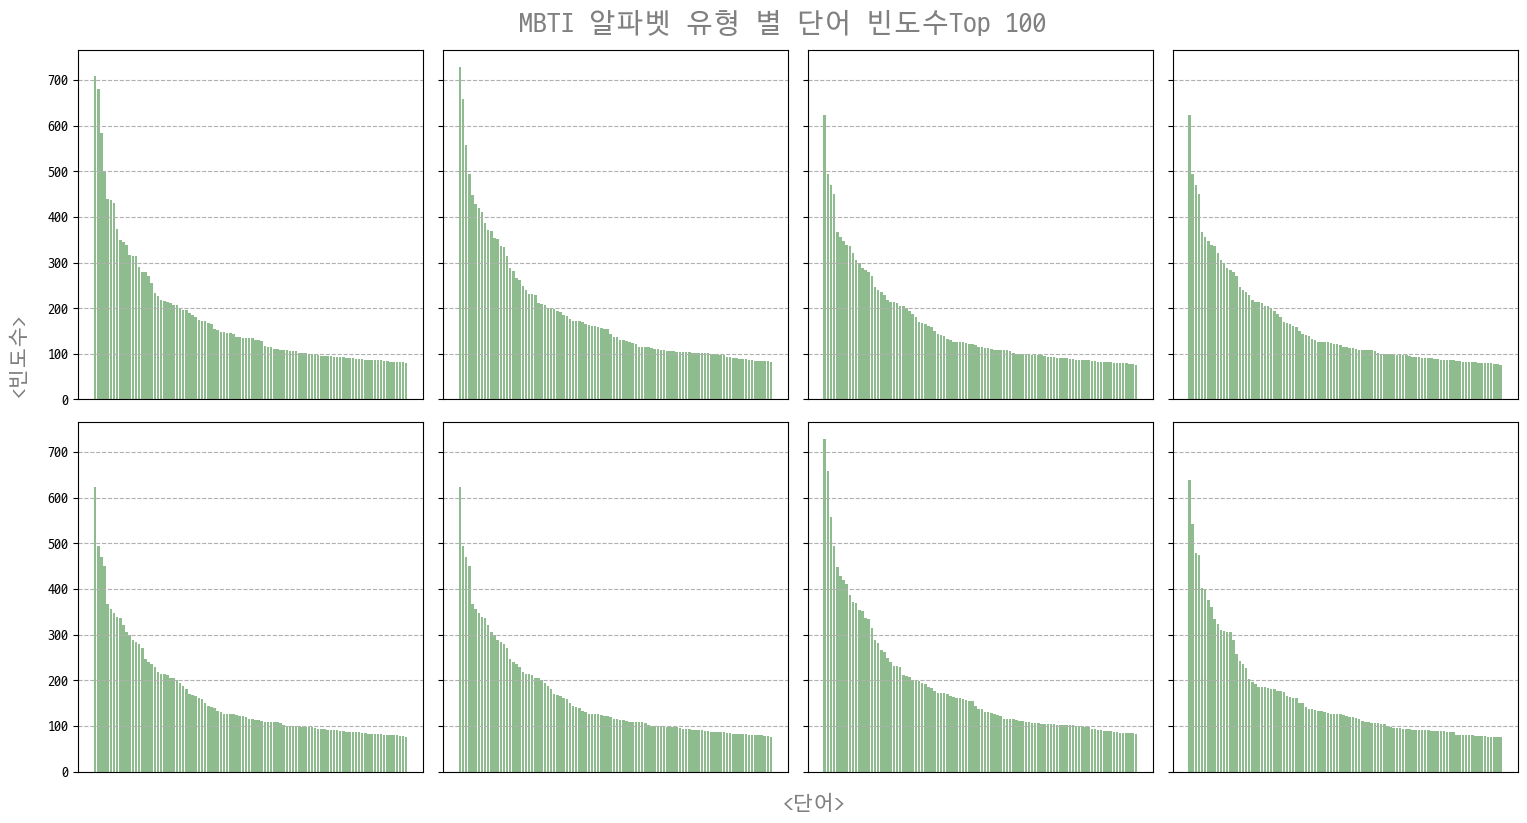

In [113]:
columns = ['E/I', 'S/N', 'T/F', 'J/P']

top_n = 100  # 상위 n개 단어

# 서브 플롯 사이즈
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)

# 서브플롯 전체 제목 설정
fig.suptitle("MBTI 알파벳 유형 별 단어 빈도수Top {}".format(top_n), fontsize=20, color='gray')

# 전체 서브플롯 x축, y축 이름 설정
fig.text(0.5, -0.02, "<단어>", fontsize=15, color='gray')
fig.text(-0.015, 0.5, "<빈도수>", fontsize=15, rotation='vertical', color='gray')

for i, col in enumerate(tqdm(columns)):

    # 각각의 columns 에 대해서 값이 1, 0 일때 총 1000개의 데이터
    filtered_df_1 = df[df[col] == 1][:100]
    filtered_df_0 = df[df[col] == 0][:100]    
    
    # 'posts' 열의 모든 단어를 하나의 리스트로 합치기
    word_list_1 = ' '.join(filtered_df_1['posts']).split()
    word_list_0 = ' '.join(filtered_df_0['posts']).split()

    # 단어 빈도수 계산
    word_counts_1 = Counter(word_list_1)
    word_counts_0 = Counter(word_list_0)

    # 빈도수 상위 n개 단어 추출
    top_words_1 = dict(word_counts_1.most_common(top_n))
    top_words_0 = dict(word_counts_0.most_common(top_n))
    
    
    # 바 그래프 그리기
    # 값이 1일 때
    axes[0, i].bar(top_words_1.keys(), top_words_1.values(), color='darkseagreen')
    axes[0, i].tick_params(axis='x', rotation=90, labelsize=2, labelbottom=False)
    axes[0, i].set_xticks([])
    axes[0, i].grid(axis='y', ls='--')
    
    
    # 값이 0일 때
    axes[1, i].bar(top_words_0.keys(), top_words_0.values(), color='darkseagreen')
    axes[1, i].tick_params(axis='x', rotation=90, labelsize=2, labelbottom=False)
    axes[1, i].set_xticks([])
    axes[1, i].grid(axis='y', ls='--')
    
    

fig.tight_layout()    
plt.savefig('mbti_frequency_bar_100')  # 사진으로 저장

## national petition_MBTI

In [4]:
df_np = pd.read_csv('national petition_MBTI.csv')
df_np = df_np.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_np

,content,type
0,State -based and instructor full -time employe...,ISFP
1,1. In listen (current situation) \ n due to th...,ESTJ
2,"I like to write this article to the president,...",INFP
3,Teachers' promotion system scores a variety of...,INFP
4,8.2 I will petition for the damage caused by t...,INFP
...,...,...
1722,Hello \ N \ N \ 참 참 참 I will post. \ N I reall...,ENTJ
1723,Respected President \ N among the real estate ...,INFP
1724,Economic behavior.No need.It doesn't help the ...,INFP
1725,The people who are taxed by the current govern...,INFP


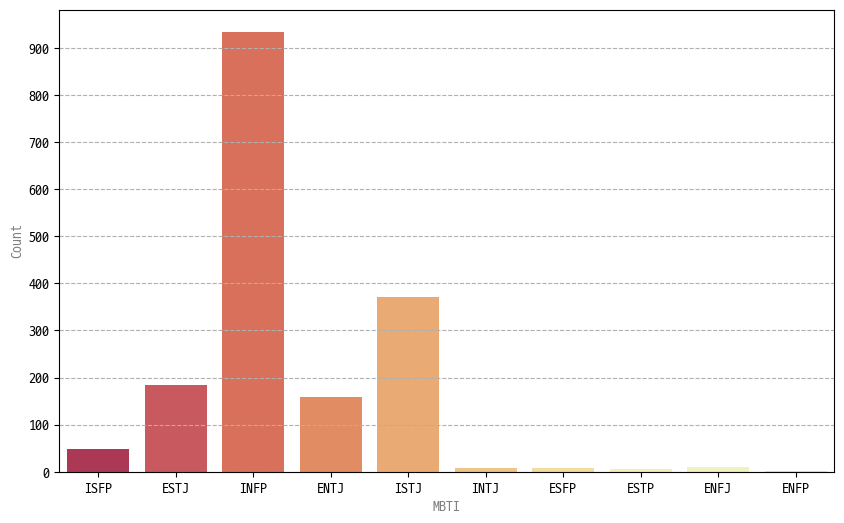

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(10, 6))
#palette = sns.color_palette("crest", n_colors=16)
palette = sns.color_palette("Spectral", n_colors=16)
sns.countplot(x='type', data=df_np, palette=palette)

#plt.title("MBTI 유형별 합계", fontsize=15, color='gray')
plt.xlabel("MBTI", color='gray')
plt.ylabel("Count", color='gray')

# y축 눈금 설정
yticks = range(0, 1000, 100)  # 눈금 간격을 100으로 설정
plt.yticks(yticks)

ax.yaxis.grid(ls='--')

plt.savefig('national petition_MBTI(1)')
plt.show()



## broken yaxis

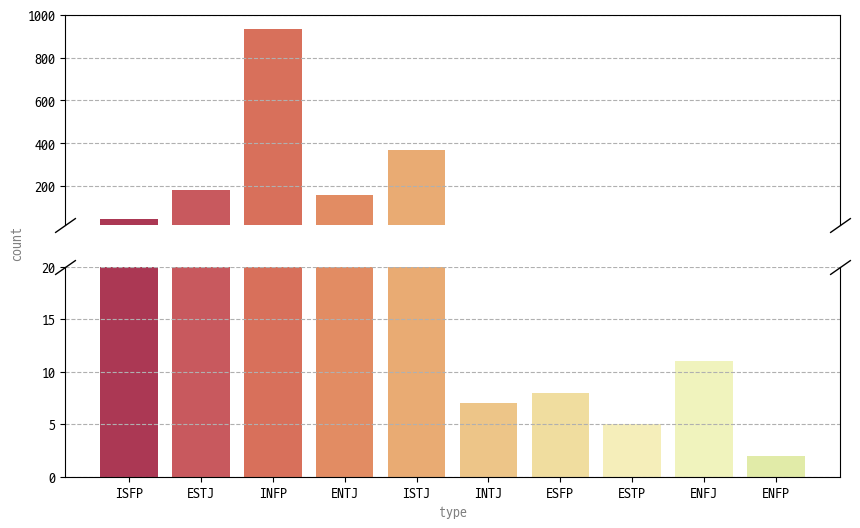

In [165]:
# subplot
f, (ax1, ax2) = plt.subplots(figsize=(10, 6), ncols=1, nrows=2, sharex=True)

# making yaxis grid
ax1.yaxis.grid(ls='--')
ax2.yaxis.grid(ls='--')

palette = sns.color_palette("Spectral", n_colors=16)

#making barplot for each subplot ax1 and ax2
ax1 = sns.countplot(x='type', data=df_np, palette=palette, ax=ax1)
ax2 = sns.countplot(x='type', data=df_np, palette=palette, ax=ax2)

plt.xticks()
plt.yticks()

ax1.set_ylim(20, 1000)
ax2.set_ylim(0, 20)

ax1.set_ylabel("")
ax2.set_ylabel("")

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

f.text(0.07, 0.50, "count", va='center', rotation = 'vertical', color='gray')
ax1.get_xaxis().set_visible(False)

# how big to make the diagonal lines in axes coordinates
d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


ax1.set_xlabel("")
ax2.set_xlabel("type", color='gray')

#plt.title("national petition_MBTI", fontsize=15, color='gray')
plt.savefig('national petition_MBTI')
plt.show()

## 다른 MBTI로 잘못된 예측

In [168]:
df_diff = pd.read_csv('grouped_diff.csv')
df_diff = df_diff.drop(columns=['Unnamed: 0'])
df_diff

,label,predic_label,count
0,0,1,26
1,0,2,37
2,0,3,15
3,0,4,25
4,0,5,5
...,...,...,...
153,15,9,5
154,15,10,2
155,15,11,29
156,15,13,4


In [169]:
df_diff['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 11, 15])

In [170]:
labels = {"INFJ" : 0, "INTJ" : 1, "INFP" : 2, "INTP" : 3, "ENFJ" : 4, "ENTJ" : 5,
              "ENFP" : 6, "ENTP" : 7, "ISTJ" : 9, "ISTP" : 11, "ESTP" : 15}

sub_labels = {"INFJ" : 0, "INTJ" : 1, "INFP" : 2, "INTP" : 3, "ENFJ" : 4, "ENTJ" : 5,
              "ENFP" : 6, "ENTP" : 7, "ISFJ" : 8, "ISTJ" : 9, "ISFP" : 10, "ISTP" : 11,
                "ESFJ" : 12, "ESTJ" : 13, "ESFP" : 14, "ESTP" : 15}

In [171]:
plt.rcParams['font.family'] = 'd2coding'
plt.rcParams['axes.unicode_minus'] = False

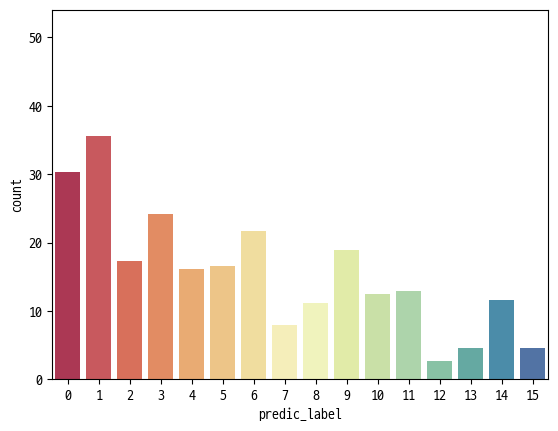

In [185]:
    palette = sns.color_palette("Spectral", n_colors=16)
    sns.barplot(x='predic_label', y='count', data=df_diff, errwidth=0, palette=palette) 
    
    #plt.xlabel("MBTI", color='gray')
    #plt.ylabel("Count", color='gray')
    plt.show()

## 11개 MBTI 잘못된 예측

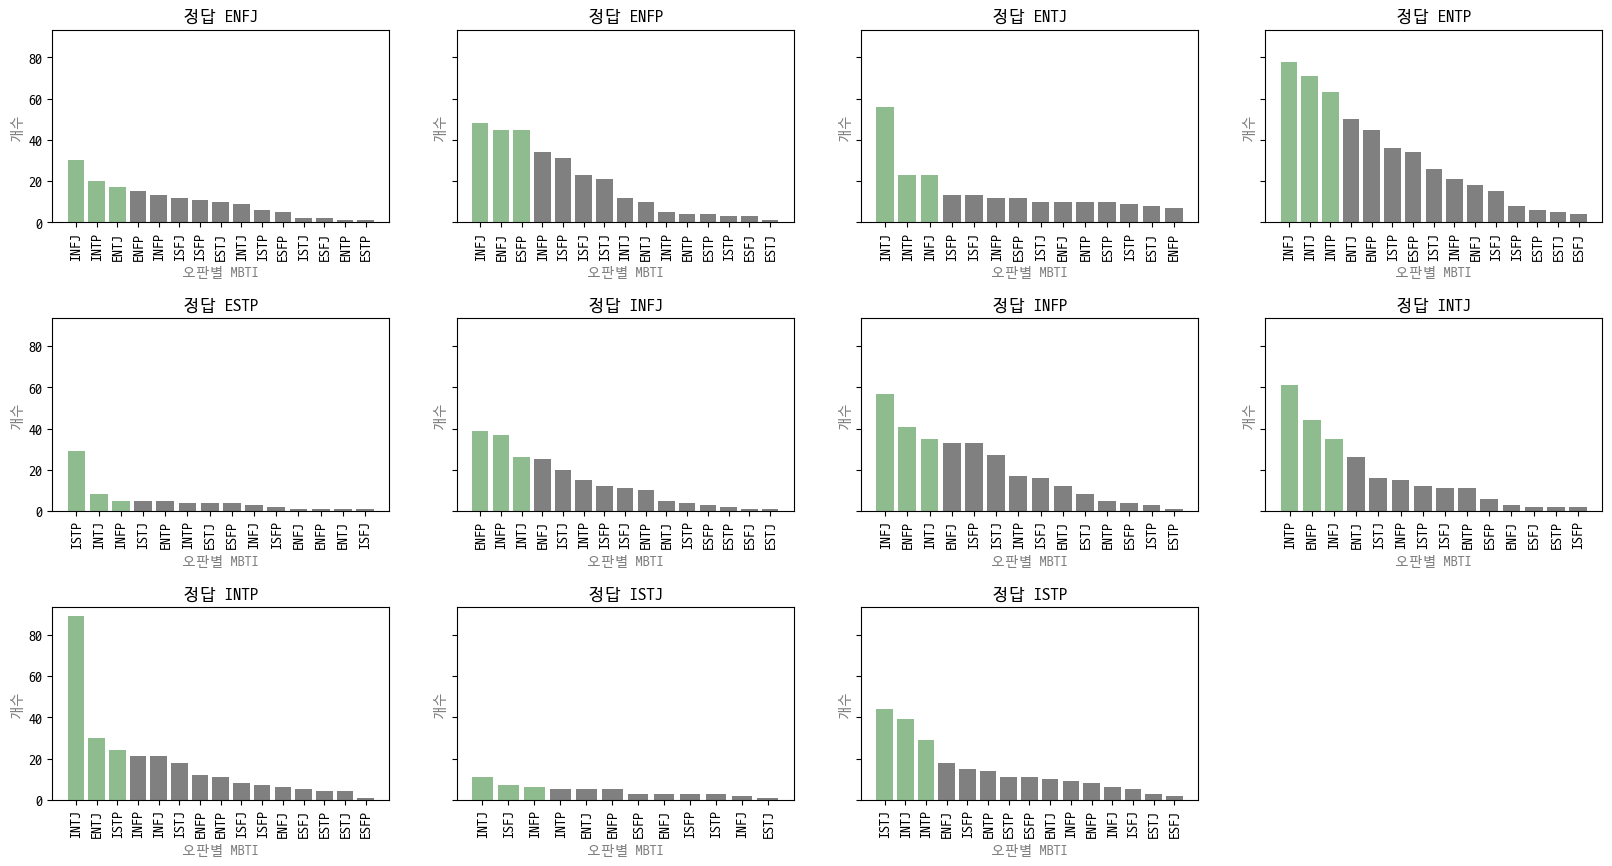

In [230]:
# 카운트 서브그래프 생성
fig, axs = plt.subplots(3, 4, figsize=(20, 10), sharey=True)  # nrows를 3, ncols를 4로 설정
fig.subplots_adjust(hspace=0.5)
labels = sorted(label_counts['label'].unique())

# 강조할 상위 개수
highlight_count = 3

for i, label in enumerate(labels):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    counts = label_counts[label_counts['label'] == label]
    
    # 상위 개수에 따라 색상 지정
    colors = ['gray'] * len(counts)
    if len(counts) >= highlight_count:
        colors[:highlight_count] = ['darkseagreen'] * highlight_count
    
    # 바 그래프 그리기
    bars = ax.bar(counts['predic_label'], counts['count'], color=colors)
    
    # 예측 레이블 이름 추가 및 세로 표시
    ax.set_xticks(counts['predic_label'])
    ax.set_xticklabels(counts['predic_label'], rotation='vertical')
    
    ax.set_xlabel('오판별 MBTI', color='gray')
    ax.set_ylabel('개수', color='gray')
    ax.set_title('정답 {}'.format(label))

# 서브그래프 레이아웃 조정
if len(labels) < 12:  # 총 3줄이므로 12개보다 적은 경우에만 조정
    for i in range(len(labels), 12):
        row = i // 4
        col = i % 4
        fig.delaxes(axs[row, col])

plt.show()


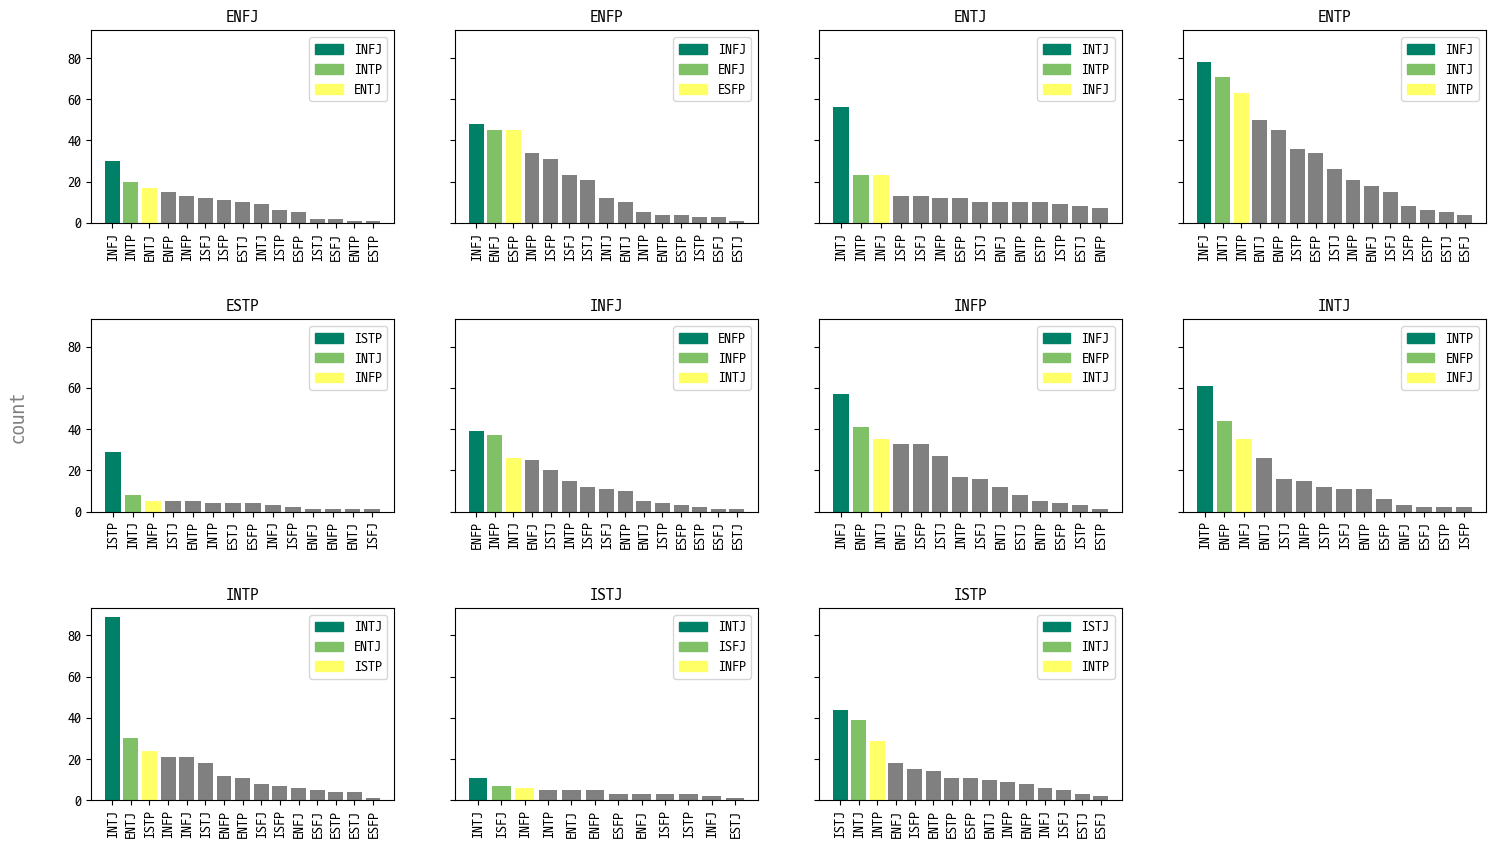

In [249]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# 카운트 서브그래프 생성
fig, axs = plt.subplots(3, 4, figsize=(18, 10), sharey=True)  # nrows를 3, ncols를 4로 설정
fig.subplots_adjust(hspace=0.5)
labels = sorted(label_counts['label'].unique())

fig.text(0.08, 0.47, "count", fontsize=15, rotation='vertical', color='gray')

# 강조할 상위 개수
highlight_count = 3

# 그라데이션 색상 생성 함수
def generate_gradient_colors(n):
    cmap = plt.cm.get_cmap('summer')  # 원하는 색상 맵 선택
    gradient_colors = [cmap(x) for x in np.linspace(0, 1, n)]
    return gradient_colors

for i, label in enumerate(labels):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    counts = label_counts[label_counts['label'] == label]
    
    # 상위 3개 레이블 추출
    top_labels = counts.nlargest(3, 'count')['predic_label']
    legend_labels = [str(lbl) for lbl in top_labels]
    
    
    # 상위 개수에 따라 그라데이션 색상 생성
    colors = ['gray'] * len(counts)
    if len(counts) >= highlight_count:
        gradient_colors = generate_gradient_colors(highlight_count)
        colors[:highlight_count] = gradient_colors
    
    # 바 그래프 그리기
    bars = ax.bar(counts['predic_label'], counts['count'], color=colors)
    
    # 예측 레이블 이름 추가 및 세로 표시
    ax.set_xticks(counts['predic_label'])
    ax.set_xticklabels(counts['predic_label'], rotation='vertical')
    
    #ax.set_xlabel('오판별 MBTI', color='gray')
    #ax.set_ylabel('개수', color='gray')
    ax.set_title('{}'.format(label))

    # 범례를 서브그래프 내부에 추가
    #ax.legend(legend_labels, loc='upper right', fontsize='small')
    
     # legend 생성
    legend_patches = []
    for j, bar in enumerate(bars[:highlight_count]):
        legend_label = counts['predic_label'].iloc[j]  # 원래 x 값으로 레이블 설정
        legend_patch = mpatches.Patch(color=bar.get_facecolor(), label=legend_label)
        legend_patches.append(legend_patch)
    ax.legend(handles=legend_patches)
    
    
# 서브그래프 레이아웃 조정
if len(labels) < 12:  # 총 3줄이므로 12개보다 적은 경우에만 조정
    for i in range(len(labels), 12):
        row = i // 4
        col = i % 4
        fig.delaxes(axs[row, col])

plt.savefig('mbti_diff(1)')
plt.show()


## 예측 성공 확률

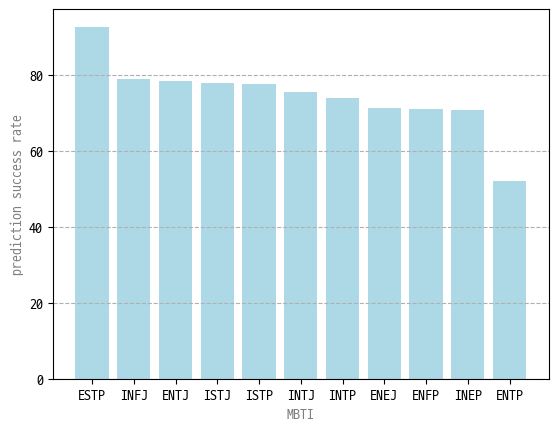

In [26]:
import matplotlib.pyplot as plt

label = ['ENEJ', 'ENFP', 'ENTJ', 'ENTP', 'ESTP', 'INFJ', 'INEP', 'INTJ', 'INTP', 'ISTJ', 'ISTP']
per = [71.106942, 71.071071, 78.378378, 51.951952, 92.588832, 78.878879, 70.770771, 75.375375, 73.873874, 77.685950, 77.577578]

# 높은 순으로 데이터 정렬
sorted_data = sorted(zip(label, per), key=lambda x: x[1], reverse=True)
sorted_label, sorted_per = zip(*sorted_data)

plt.bar(sorted_label, sorted_per, color='lightblue')
plt.grid(axis='y', ls='--')

plt.xlabel('MBTI', color='gray')
plt.ylabel('prediction success rate', color='gray')

plt.savefig('mbti_percent')
plt.show()


## 최대값, 최소값, 평균 강조 

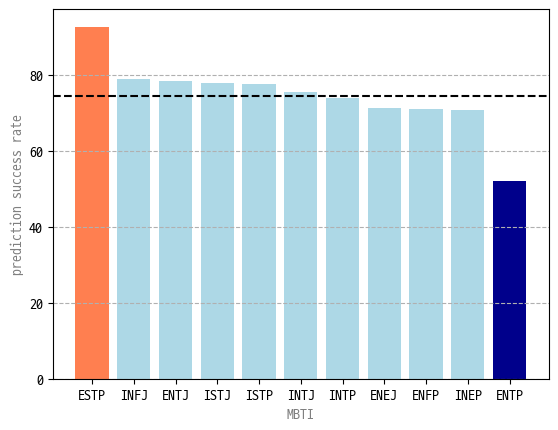

In [39]:
import matplotlib.pyplot as plt
import numpy as np

label = ['ENEJ', 'ENFP', 'ENTJ', 'ENTP', 'ESTP', 'INFJ', 'INEP', 'INTJ', 'INTP', 'ISTJ', 'ISTP']
per = [71.106942, 71.071071, 78.378378, 51.951952, 92.588832, 78.878879, 70.770771, 75.375375, 73.873874, 77.685950, 77.577578]

# 높은 순으로 데이터 정렬
sorted_data = sorted(zip(label, per), key=lambda x: x[1], reverse=True)
sorted_label, sorted_per = zip(*sorted_data)

# 평균값 계산
mean_value = np.mean(per)

# 가장 낮은 값과 가장 높은 값의 인덱스 찾기
lowest_index = per.index(min(per))
highest_index = per.index(max(per))

# 막대 그래프 그리기
plt.bar(sorted_label, sorted_per, color='lightblue')
plt.bar(sorted_label[0], sorted_per[0], color='coral')
plt.bar(sorted_label[10], sorted_per[10], color='darkblue')
plt.axhline(mean_value, color='k', linestyle='--')  # 평균값 가로선 추가

plt.grid(axis='y', ls='--')

plt.xlabel('MBTI', color='gray')
plt.ylabel('prediction success rate', color='gray')

plt.savefig('mbti_percent(2)')
plt.show()